# Анализ рекламной кампании приложения **Procrastinate Pro+**

**Объект исследования**:
Рекламная кампания приложения **Procrastinate Pro+** за период с **01.05.19** по **27.10.19**. Известно, что за этот период были большие вложения в рекламу, однако она оказалась убыточной.

**Задача**:
Выявить причину убыточности и дать рекомендации по исправлению ситуации. Учесть, что пользователи должны окупаться не позднее чем через две недели после привлечения

**Описание данных**:

1. Лог сервера с данными о посещении пользователей (**visits_info_short.csv**)
* User Id — уникальный идентификатор пользователя
* Region — страна пользователя
* Device — тип устройства пользователя
* Channel — идентификатор источника перехода
* Session Start — дата и время начала сессии
* Session End — дата и время окончания сессии
2. Выгрузка покупок пользователей (**orders_info_short.csv**)
* User Id — уникальный идентификатор пользователя
* Event Dt — дата и время покупки
* Revenue — сумма заказа
3. Рекламные расходы (**costs_info_short.csv**)
* dt — дата проведения рекламной кампании
* Channel — идентификатор рекламного источника
* costs — расходы на эту кампанию

**План исследования:**

1. Предобрабтка данных

* Изучить данные, проверить на наличие пропусков и дубликатов.
* Привести типы данных в соответствие их значениям

2. Объявление функций для расчёта и анализа LTV, ROI, удержания и конверсии.
* get_profiles() — для создания профилей пользователей,
* get_retention() — для подсчёта Retention Rate,
* get_conversion() — для подсчёта конверсии,
* get_ltv() — для подсчёта LTV.
* filter_data() — для сглаживания данных,
* plot_retention() — для построения графика Retention Rate,
* plot_conversion() — для построения графика конверсии,
* plot_ltv_roi — для визуализации LTV и ROI.

3. Исследовательский анализ данных
* Составить профили пользователей, определить минимальную и максимальную даты привлечения пользователей.
* Отразить количество пользователей и долю платящих из каждой страны.
* Отразить количество пользователей и долю платящих для каждого устройства.
* Отразить количество пользователей и долю платящих для каждого канала привлечения.

4. Исследование расходов на маркетинг
* Посчитать общую сумму расходов на маркетинг.
* Визуализировать динамику изменения расходов во времени по каждому источнику
* Оценить, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника

5. Анализ окупаемости рекламы
* Проанализировать окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.
* Проверить конверсию пользователей и динамику её изменения.
* Построить и изучить графики конверсии и удержания.
* Проанализировать окупаемость рекламы с разбивкой по устройствам, по странам, по каналам привлечения.

6. Выводы
* Объяснить причины неэффективности привлечения пользователей и убыточности рекламы.
* Сформулировать рекомендации для отдела маркетинга.

## Предобработка данных

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')
    
except:
    visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')
    costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')


display(visits.head())
display(orders.head())
display(costs.head())

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [3]:
display(f'Дубликатов в таблице visits: {visits.duplicated().sum()}',
      f'Дубликатов в таблице orders: {orders.duplicated().sum()}',
      f'Дубликатов в таблице costs: {costs.duplicated().sum()}')

'Дубликатов в таблице visits: 0'

'Дубликатов в таблице orders: 0'

'Дубликатов в таблице costs: 0'

In [4]:
print('Таблица visits')
print(visits.info())
print()
print('Таблица orders')
print(orders.info())
print()
print('Таблица costs')
print(costs.info())

Таблица visits
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None

Таблица orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None

Таблица costs
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 

Приведём названия столбцов к **snake_case**, а столбцы с датами к типу **datetime**.

In [5]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
costs.columns = costs.columns.str.lower().str.replace(' ', '_')

display(visits.columns.values)
display(orders.columns.values)
display(costs.columns.values)

array(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'], dtype=object)

array(['user_id', 'event_dt', 'revenue'], dtype=object)

array(['dt', 'channel', 'costs'], dtype=object)

In [6]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

**Выводы:** Данные выгружены корректно, дубликаты и пропуски отсутствуют, названия столбцов приведены к **snake_case**, столбцы с датами к типу **datetime**.

## Объявление функций

### get_profiles()

In [7]:
def get_profiles(sessions, orders, ad_costs):
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


### get_retention()

In [8]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### get_conversion()

In [9]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### get_ltv()

In [10]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )
        roi = result.div(cac['cac'], axis=0)
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )
    if 'cohort' in dimensions:
        dimensions = []
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### filter_data()

In [11]:
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

### plot_retention()

In [12]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в четвёртой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

### plot_conversion()

In [13]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### plot_ltv_roi()

In [14]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    cac_history = roi_history[['cac']]
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()


## Исследовательский анализ данных

### Создание профилей пользователей

In [15]:
profiles = get_profiles(visits, orders, costs)
display(profiles.head())
print('Минимальная дата привлечения пользователей:', profiles.dt.min())
print('Максимальная дата привлечения пользователей:', profiles.dt.max())

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


Таким образом, имеем данные с 01.05.19 по 27.10.2019, по условию момент анализа - 01.11.19.

### Распределение платящих пользователей по странам, устройствам, источникам привлечения

In [16]:
def table_payers(profiles, dimension):
    payers = profiles.groupby(dimension).agg({'payer':['count','sum','mean']})
    payers.columns = ['total_users', 'total_payers', 'payers_percent']
    payers['payers_percent'] = round(payers['payers_percent']*100, 2)
    return payers.sort_values(by='payers_percent', ascending=False).style.background_gradient(cmap ="coolwarm")

table_payers(profiles, 'region')

,total_users,total_payers,payers_percent
region,,,
United States,100002,6902,6.900000
Germany,14981,616,4.110000
UK,17575,700,3.980000
France,17450,663,3.800000


За полгода наблюдений платящих пользователей из США оказалось примерно в десять раз больше, чем из любой другой страны, процент платящих пользователей также самый высокий, 6.9% Остальные страны сопоставимы по численности платящих пользователей (от 616 в Германии до 700 в Англии) и по их проценту (от 3.8 во Франции до 4.1 в Германии)

In [17]:
table_payers(profiles, 'device')

,total_users,total_payers,payers_percent
device,,,
Mac,30042,1912,6.360000
iPhone,54479,3382,6.210000
Android,35032,2050,5.850000
PC,30455,1537,5.050000


Больше всего платящих пользователей пользуются **iPhone** (3382, в полтора раза больше других категорий), а самый высокий процент платящих - среди пользователей **Mac** (6.36%).

In [18]:
table_payers(profiles, 'channel')

,total_users,total_payers,payers_percent
channel,,,
FaceBoom,29144,3557,12.200000
AdNonSense,3880,440,11.340000
lambdaMediaAds,2149,225,10.470000
TipTop,19561,1878,9.600000
RocketSuperAds,4448,352,7.910000
WahooNetBanner,8553,453,5.300000
YRabbit,4312,165,3.830000
MediaTornado,4364,156,3.570000
LeapBob,8553,262,3.060000


Больше всего платящих пользователей привлечено по каналу **FaceBoom** (3557), процент платящих пользователей самый высокий (12.2%). 

На втором месте - **TipTop** (1878 платящих пользователей), но их процент среди привлечённых через этот канал скромнее - 9.6%. 

Самый скромный процент платящих пользователей, 2.06%, среди пользователей, которые пришли без оплачиваемого привлечения (**organic**), но по их численности это третье место (1160 платящих пользователей).

Обращают на себя внимание каналы привлечения **AdNonSense** и **lambdaMedaAds** - общее число привлечённых платящих пользователей невелико, однако их процент от всех ими привлечённых достаточно высокий - 11.3% и 10.5%, соответственно. 

### Расходы на маркетинг

In [19]:
total_cost = round(costs['costs'].sum(), 2)

channel_total_costs = costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs', ascending=False)
channel_total_costs['costs_percent'] = round(channel_total_costs['costs'] / total_cost * 100, 2)

display(channel_total_costs)
print(f'Общая сумма расходов на маркетинг с 01.05.19 по 27.10.19: ${total_cost}')

,costs,costs_percent
channel,,
TipTop,54751.30,51.90
FaceBoom,32445.60,30.75
WahooNetBanner,5151.00,4.88
AdNonSense,3911.25,3.71
OppleCreativeMedia,2151.25,2.04
RocketSuperAds,1833.00,1.74
LeapBob,1797.60,1.70
lambdaMediaAds,1557.60,1.48
MediaTornado,954.48,0.90


Общая сумма расходов на маркетинг с 01.05.19 по 27.10.19: $105497.3


Более половины расходов на маркетинг уходит на **TipTop** и более 30% - на **FaceBoom**, по остальным источникам привлечения - не более 5% маркетингового бюджета. 

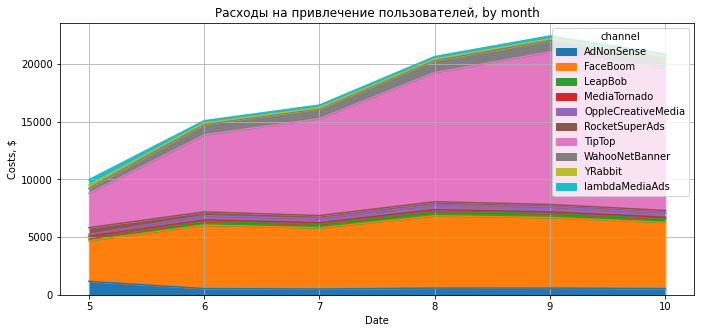

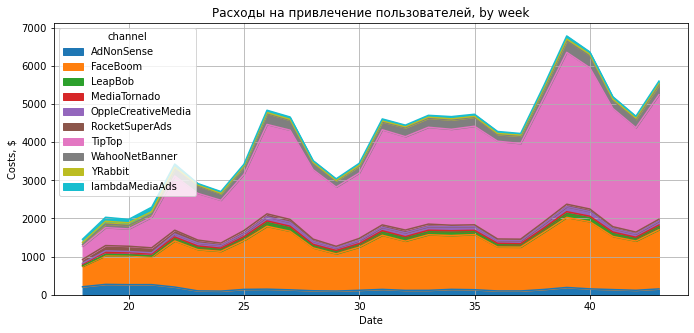

In [20]:
channel_costs = costs
channel_costs['month'] = pd.to_datetime(channel_costs['dt']).dt.month
channel_costs['week'] = pd.to_datetime(channel_costs['dt']).dt.isocalendar().week

columns = ['month', 'week']
for i, col in enumerate(columns):
    table_plot = channel_costs.pivot_table(index = col,
                                           columns = 'channel',
                                           values = 'costs',
                                           aggfunc = 'sum')
    table_plot.plot.area(figsize=(25,5), ax = plt.subplot(1, 2, i + 1), grid=True)
    plt.title(f'Расходы на привлечение пользователей, by {col}')
    plt.xlabel('Date')
    plt.ylabel('Costs, $')
    plt.show()

Ежемесячные расходы на **TipTop** с начала периода исследования выросли в несколько раз, на **FaceBoom** - в районе 30%. На недельном графике видны пики расходов на все каналы привлечения пользователей, по всей видимости совпадающие по времени с периодами активных рекламных кампаний.

,acquisition_cost,acq_cost_deviation
channel,,
organic,0.000000,-0.700000
LeapBob,0.210172,-0.490000
MediaTornado,0.218717,-0.480000
YRabbit,0.218975,-0.480000
OppleCreativeMedia,0.250000,-0.450000
RocketSuperAds,0.412095,-0.290000
WahooNetBanner,0.602245,-0.100000
lambdaMediaAds,0.724802,0.020000
AdNonSense,1.008054,0.300000


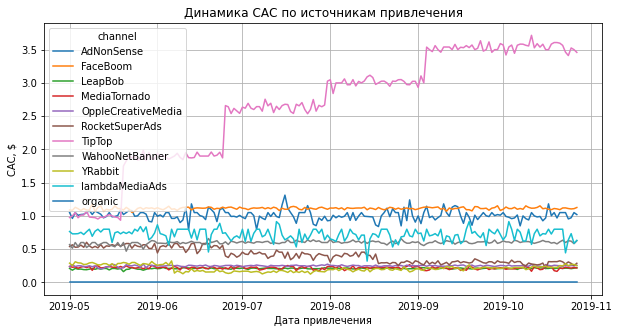

Средний CAC (все каналы привлечения, включая organic): $ 0.7


In [21]:
cac_channel = (profiles.pivot_table(index='channel',
                     values='acquisition_cost',
                     aggfunc='mean'))
cac_channel['acq_cost_deviation'] = round(cac_channel['acquisition_cost'] - profiles['acquisition_cost'].mean(), 2)

display(cac_channel.sort_values('acquisition_cost')
        .style.background_gradient(cmap ="coolwarm"))

profiles.pivot_table(index='dt',
                     columns='channel',
                     values='acquisition_cost',
                     aggfunc='mean').plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по источникам привлечения')
plt.show()

print('Средний CAC (все каналы привлечения, включая organic): $', round(profiles['acquisition_cost'].mean(), 2))

Средняя стоимость привлечения одного пользователя через TipTop в два-три раза превышает аналогичные показатели других источников привлечения. 

В динамике видим, что в ещё в мае CAC у TipTop не выделялся среди прочих и составлял 1 доллар. Но с каждым месяцем рос скачкообразно и к осени вырос до 3.5 долл. 

У прочих источников привлечения CAC досаточно стабилен, а у RocketSuperAds даже снизился с 0.5 долл. до 0.25 долл.

**Промежуточные выводы.**

Около 83% расходов на рекламу - **TipTop** (52% рекламного бюджета) и **FaceBoom** (31% рекламного бюджета).

При этом через **FaceBoom** за исследуемый период привлечено больше всего платящих пользователей (3557), процент платящих пользователей самый высокий (12.2%). **CAC** стабилен в течение времени и составляет 1.1 доллар. Общие расходы на этот канал привлечения увеличились на 30% за исследуемый период.

**TipTop** - второй по числу привлечённых пользователей (1878), процент платящих пользователей - 9.6%, достаточно высокий показатель. Однако **CAC** значительно вырос за исследуемый период с 1 доллара весной до 3.5 долларов осенью, общие расходы на этот канал привлечения увеличились в несколько раз. Необходимо проверить, окупаются ли столь выросшие расходы.

### Окупаемость рекламы

Имеем данные с 01.05.19 по 27.10.2019. Момент анализа по условию - 01.11.19. Горизонт анализа в соответствии с бизнес-планом -  14 дней.

#### Общие LTV, CAC, ROI, конверсия, удержание

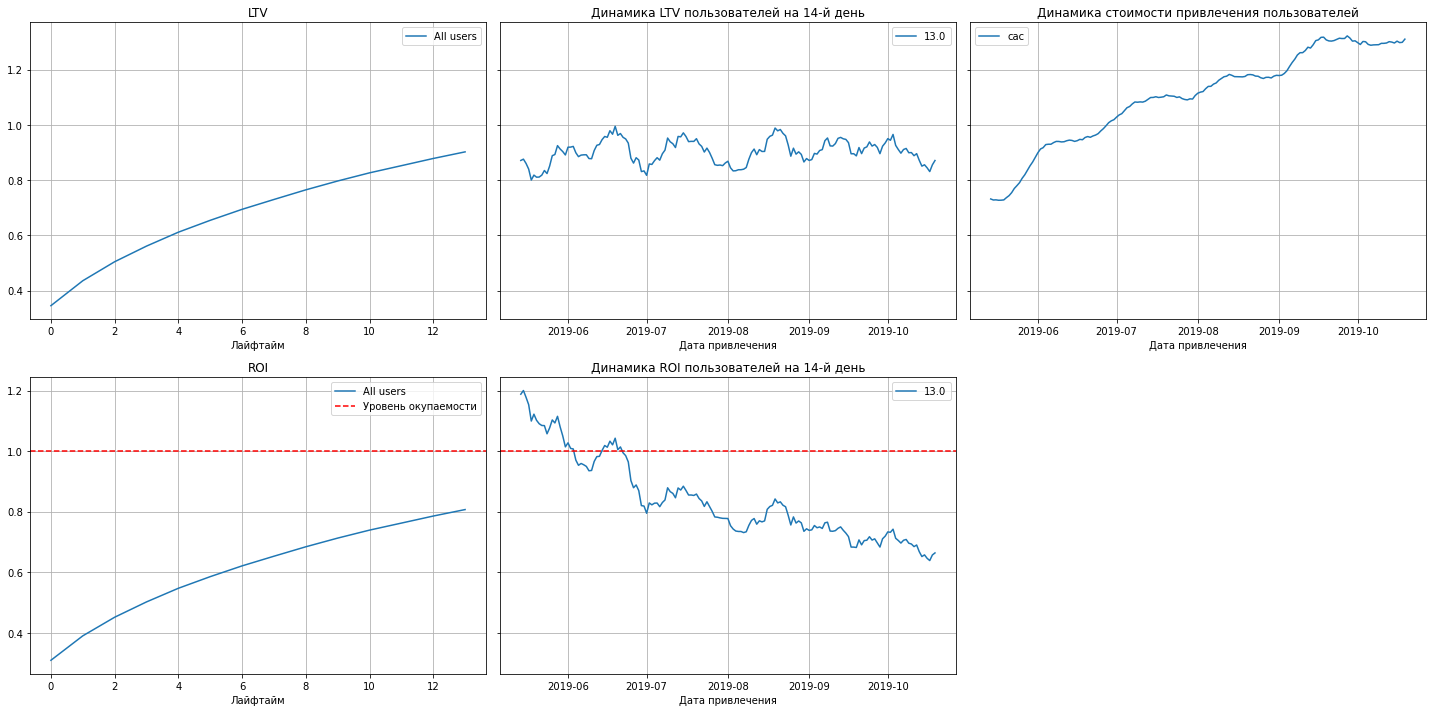

In [22]:
profiles_non_organic = profiles.query('channel != "organic"')

observation_date = datetime(2019,11,1).date()
horizon_days = 14

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles_non_organic,orders,observation_date,horizon_days)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=14)

LTV на 14-й день начиная с июня стабильно колеблется в районе 0.8 - 1 долл., при этом CAC начиная с июля превысил этот уровень и продолжал дальнейший рост до осени. Динамика ROI иллюстрирует эту тенденцию: одновременно с ростом рекламного бюджета реклама перестала окупаться, далее с каждым месяцем принося всё больше убытков. График ROI по лайфтаймам показывает убыточность рекламы.

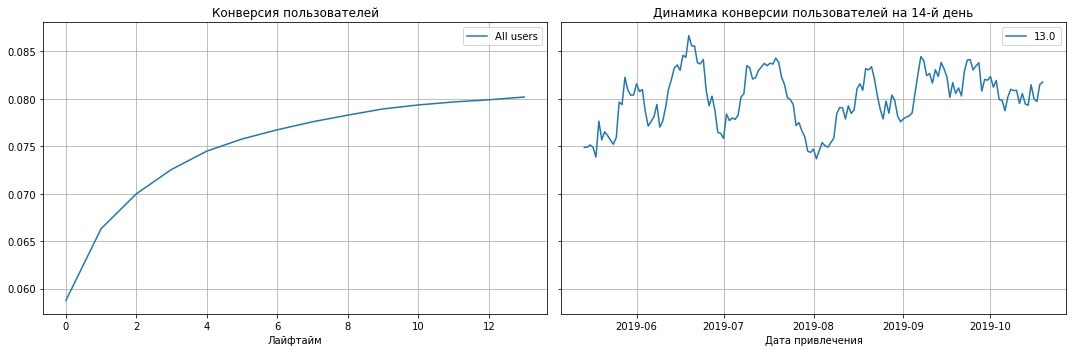

In [23]:
conversion_raw, conversion, conversion_history = get_conversion(profiles_non_organic, orders, observation_date, horizon_days)

plot_conversion(conversion, conversion_history, horizon_days, window=14)

Начиная с лета конверсия пользователей, привлечённых через платные каналы, стабильно колеблется в районе 8%

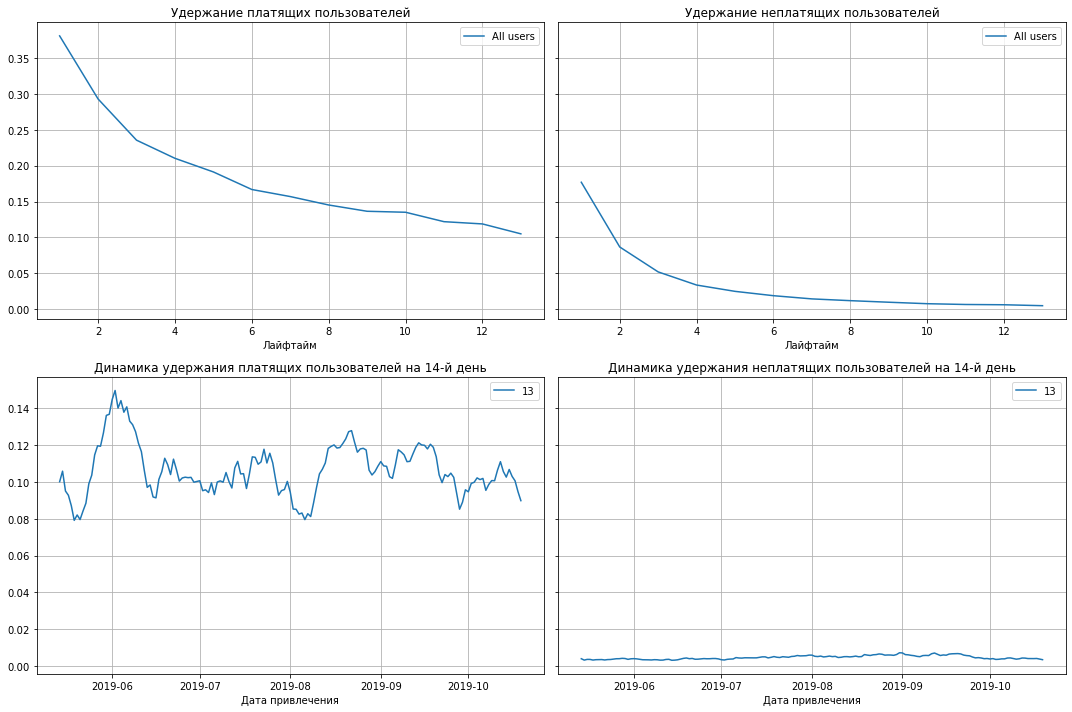

In [24]:
retention_raw, retention, retention_history = get_retention(profiles_non_organic, visits, observation_date, horizon_days)

plot_retention(retention, retention_history, horizon_days, window=14)

Показатель удержания платящих пользователей на 14-й день сезонно колебался в районе 10%.

#### Метрики в разбивке по устройствам

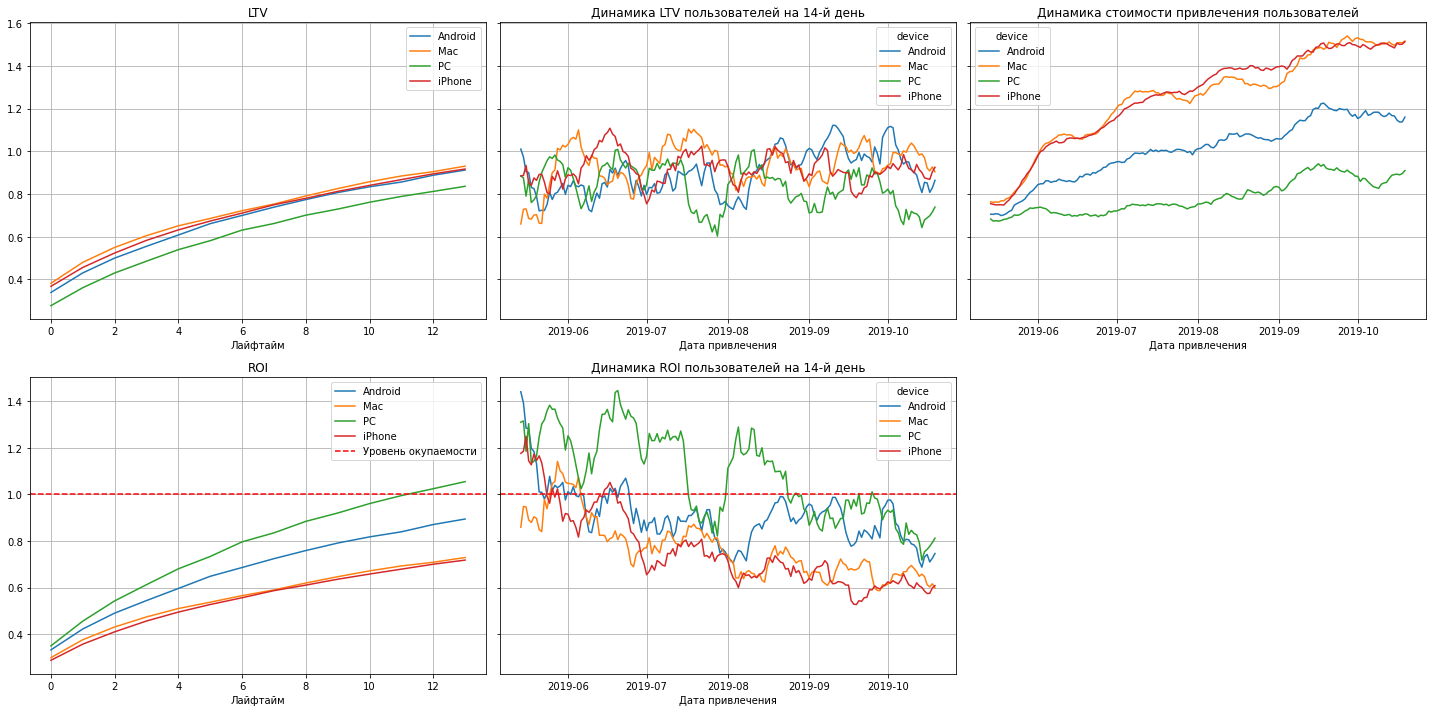

In [25]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles_non_organic,orders,observation_date,horizon_days,dimensions=['device'])

plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=14)

В среднем окупаются только пользователи PC, но на момент анализа привлечение пользователей всех устройств стало убыточным, в наибольшей степени Mac и Android. ROI на 14-й день в динамике снижается для пользователей всех устройств. 

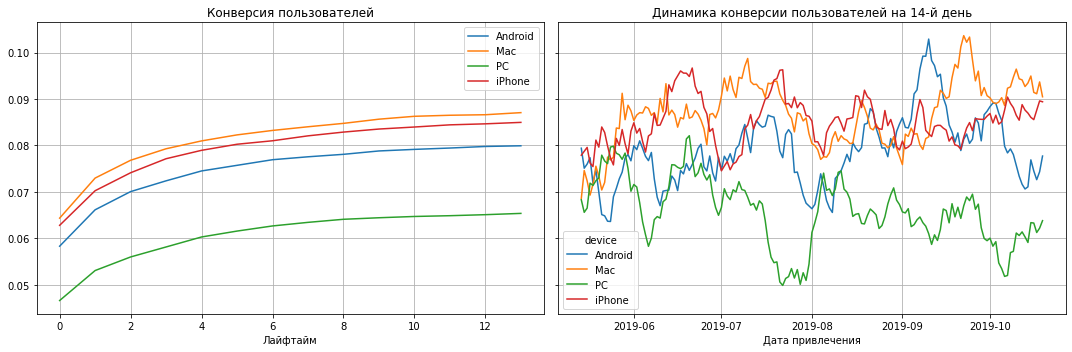

In [26]:
conversion_raw, conversion, conversion_history = get_conversion(profiles_non_organic,
                                                                orders,
                                                                observation_date,
                                                                horizon_days, dimensions=['device'])
plot_conversion(conversion, conversion_history, horizon_days, window=14)

Самая низкая конверсия - у пользователей **PC**, в динамике за последние месяцы снижалась. Самая высокая - у пользователей **Mac** и **IPhone**.

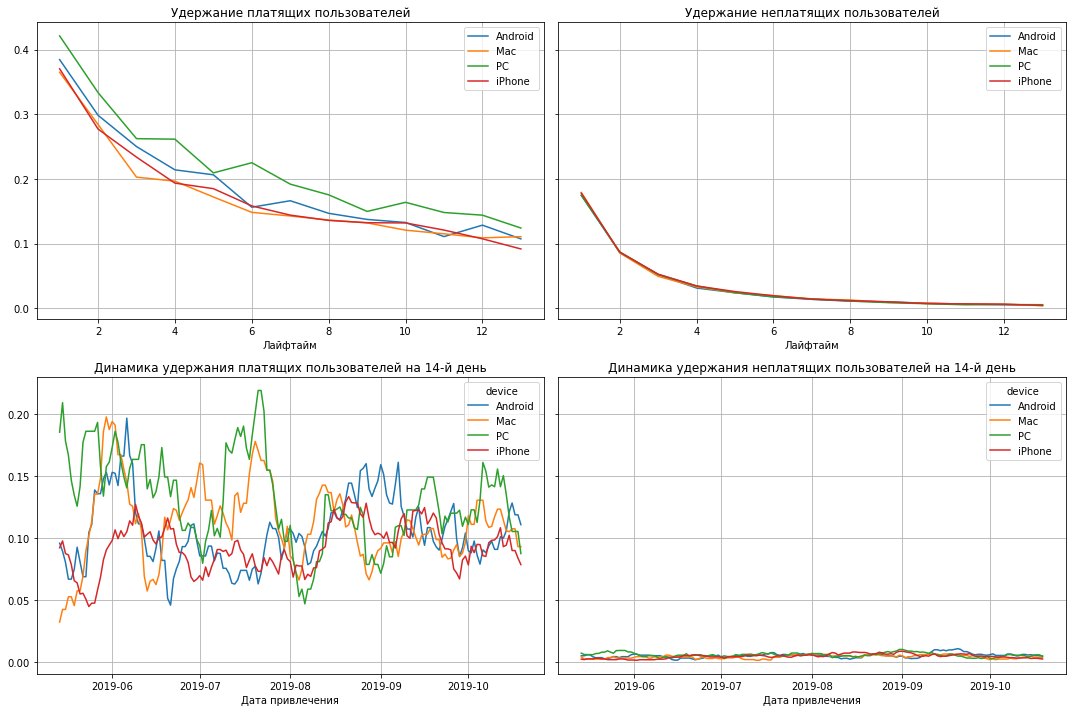

In [27]:
retention_raw, retention, retention_history = get_retention(profiles_non_organic,
                                                            visits,
                                                            observation_date,
                                                            horizon_days,
                                                            dimensions=['device'])

plot_retention(retention, retention_history, horizon_days, window=14)

Амплитуда колебаний показателей удержания пользователей различных устройств за поседние месяцы стала менее значительной и держится на уровне 10%. Удержание пользователей PC в среднем выше на 1% пользователей прочих устройств. 

#### Метрики в разбивке по каналам привлечения

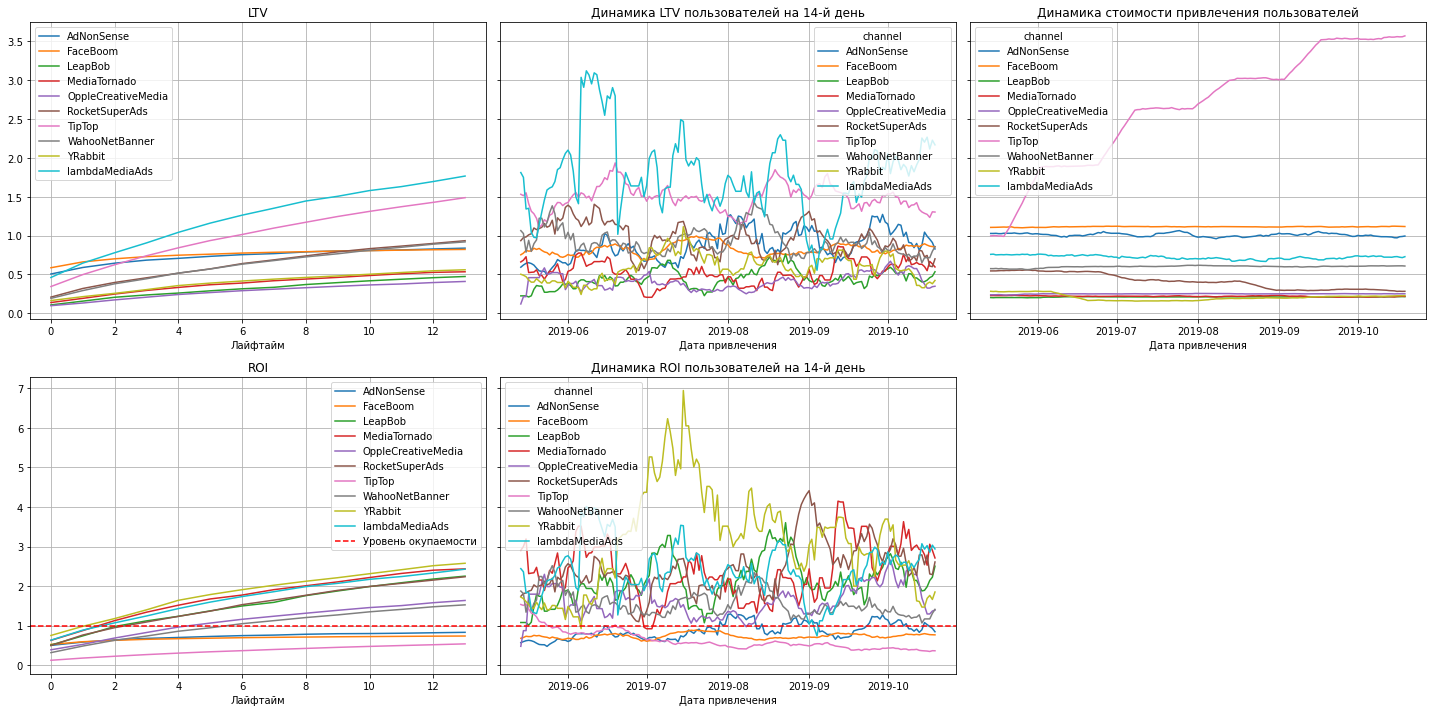

In [28]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles_non_organic,
                                                      orders,
                                                      observation_date,
                                                      horizon_days,
                                                      dimensions=['channel'])

plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=14)

Как отмечалось ранее, CAC резко вырос у источника привлечения **TipTop**, у остальных - стабилен. У этого же канала привлечения с лета - самый низкий показатель ROI, что указывает на самую высокую убыточность среди прочих источников привлечения.

Помимо **TipTop**, отмечаем убыточность у **FaceBoom**. В меньшей степени - **AdNonSense**, в динамике - на грани окупаемости.

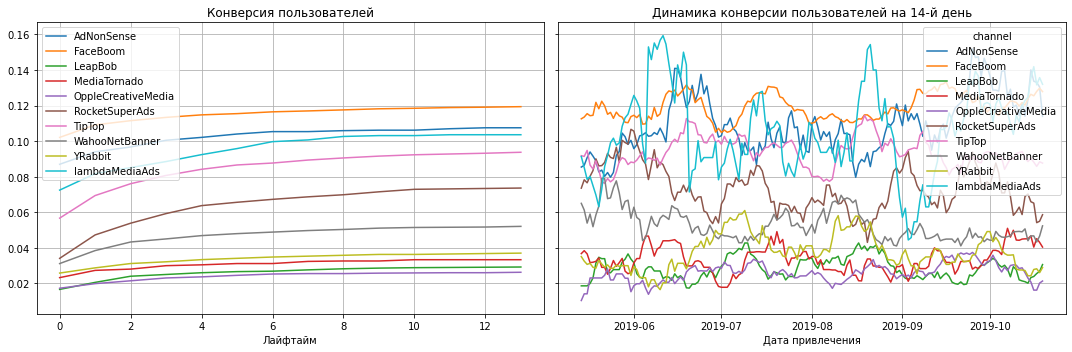

In [29]:
conversion_raw, conversion, conversion_history = get_conversion(profiles_non_organic,
                                                                orders,
                                                                observation_date,
                                                                horizon_days, dimensions=['channel'])
plot_conversion(conversion, conversion_history, horizon_days, window=14)

Наиболее высокая конверсия - у **FaceBoom**, **AdNonSence**, **lambdaMediaAds** и **TipTop**. Однако, как мы видели выше, у этих каналов, кроме **lambdaMediaAds** проблемы с окупаемостью. Что касается **lambdaMediaAds**, этот канал можно рекомендовать к использованию в дальнейшем - помимо хорошей окупаемости, видим высокие показатели конверсии, растущие в динамике. 

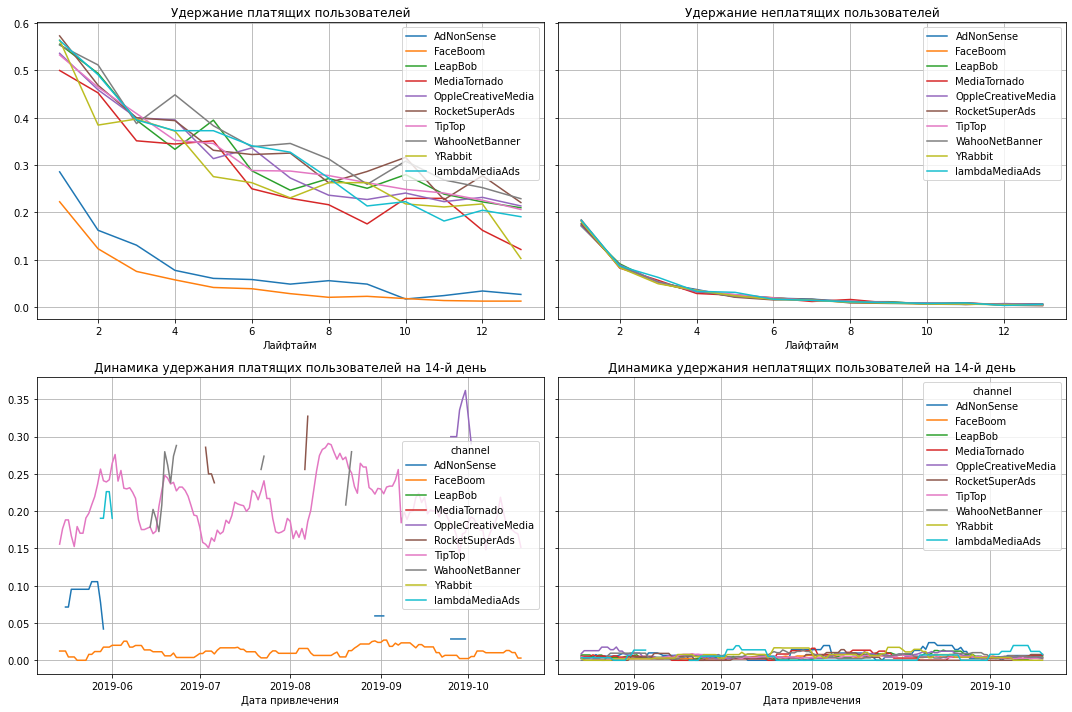

In [30]:
retention_raw, retention, retention_history = get_retention(profiles_non_organic,
                                                            visits,
                                                            observation_date,
                                                            horizon_days,
                                                            dimensions=['channel'])

plot_retention(retention, retention_history, horizon_days, window=14)

Пользователи, привлечённые через каналы **AdNonSense** и **FaceBoom**, удерживаются хуже других, к концу двух недель коэффициент удержания ниже 5%

#### Метрики в разбивке по странам

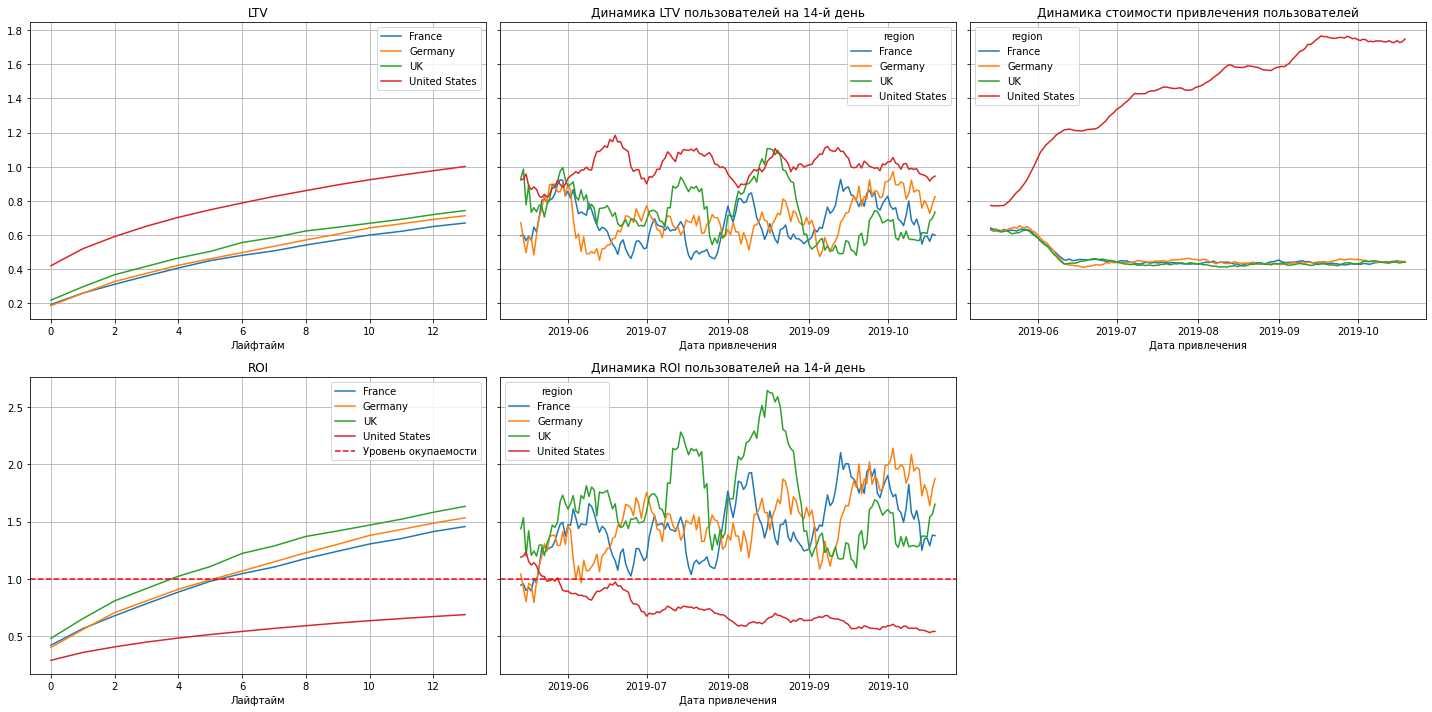

In [31]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles_non_organic,orders,observation_date,horizon_days,dimensions=['region'])

plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=14)

Убыточным с продолжающейся отрицательной динамикой за последние месяцы стало привлечение пользователей только из США. По другим странам показатели стабильны, если не брать во внимание сезонные колебания. Учитывая, что большая часть пользователей - как раз пользователи из США, не удивительно, что убыточность их привлечения привела к убыточности рекламной кампании в целом.

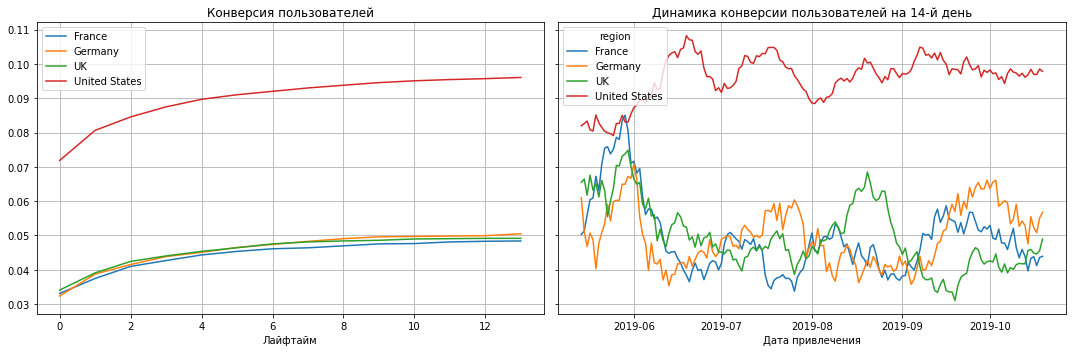

In [32]:
conversion_raw, conversion, conversion_history = get_conversion(profiles_non_organic,
                                                                orders,
                                                                observation_date,
                                                                horizon_days, dimensions=['region'])
plot_conversion(conversion, conversion_history, horizon_days, window=14)

Конверсия среди пользователей США выше, чем в Европе. Тем не менее, расходы на рекламу в этой стране, как мы увидели выше, не окупаются.

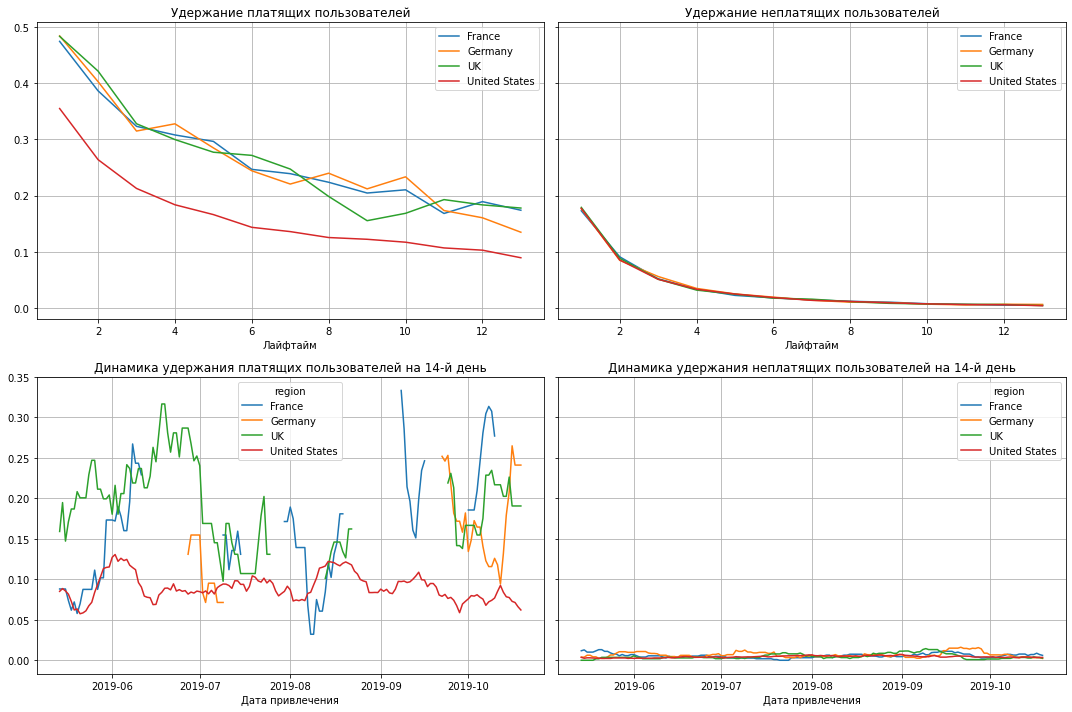

In [33]:
retention_raw, retention, retention_history = get_retention(profiles_non_organic,
                                                            visits,
                                                            observation_date,
                                                            horizon_days,
                                                            dimensions=['region'])

plot_retention(retention, retention_history, horizon_days, window=14)

Пользователи из США удерживаются хуже, чем в Европе.

#### Окупаемость в США и Европе

Учитывая, что убыточность наблюдается только среди пользователей США, рассмотрим их отдельно.

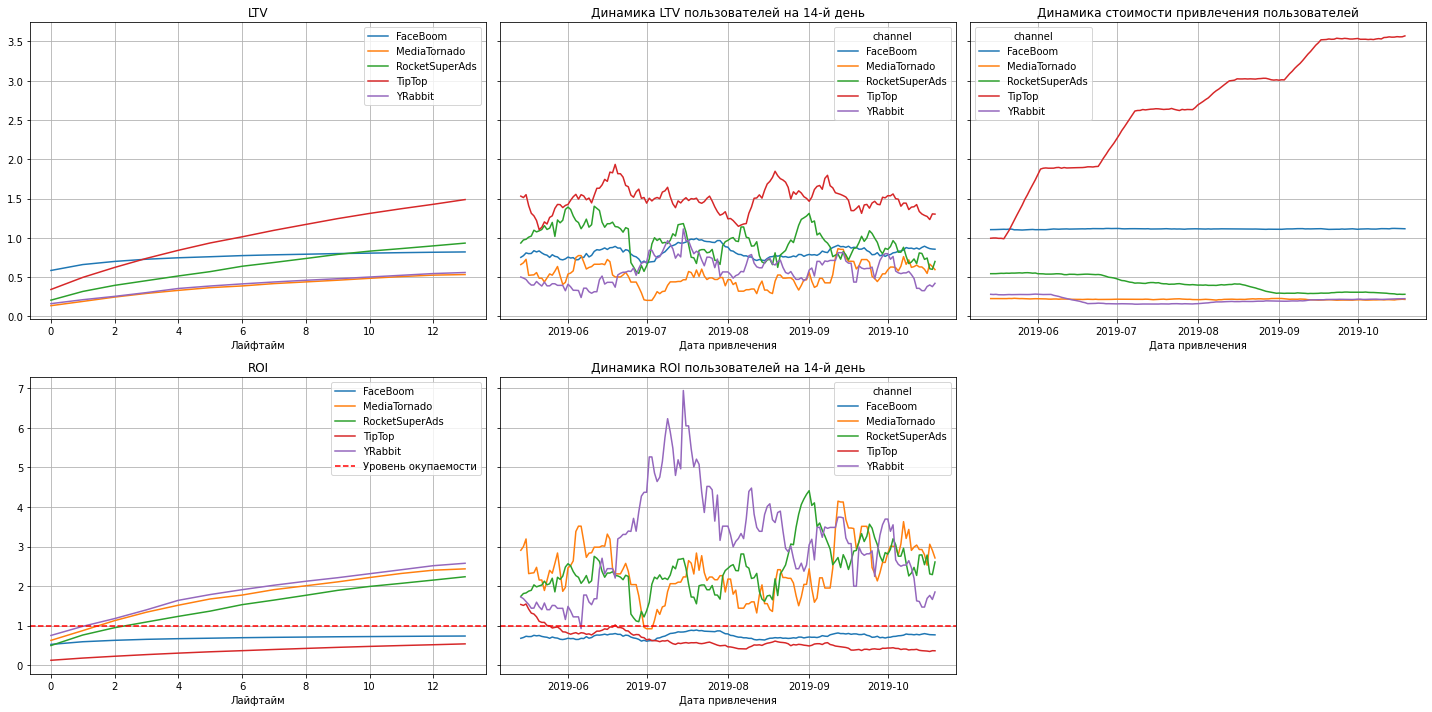

In [34]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles_non_organic.query('region == "United States"'),orders,observation_date,horizon_days,dimensions=['channel'])

plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=14)

Убедились в том, что проблемы с окупаемостью в США только у пользователей, привлечённых из **TipTop** и **FaceBoom**.

Посмотрим на эти же показатели отдельно для Европы.

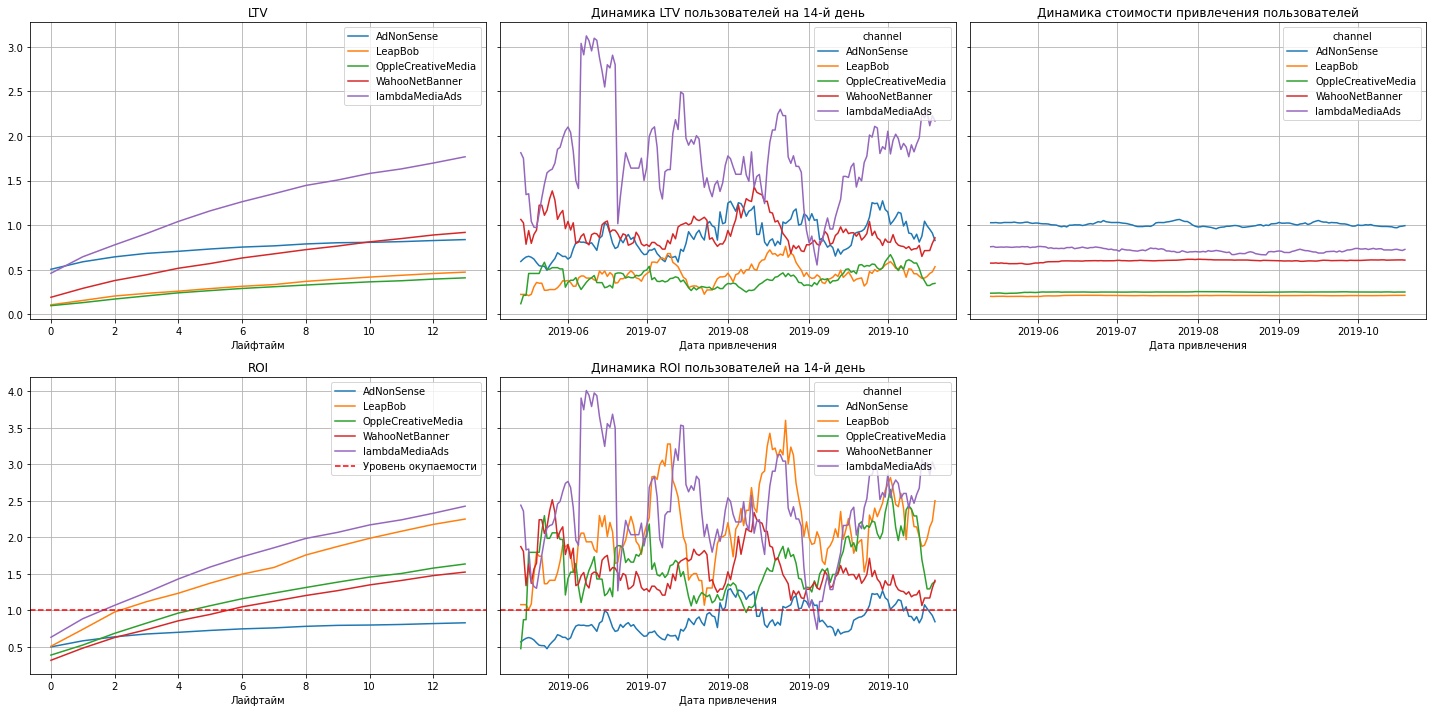

In [35]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles_non_organic.query('region != "United States"'),orders,observation_date,horizon_days,dimensions=['channel'])

plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=14)

В Европе проблемы с окупаемостью канала привлечения **AdNonSense**. Хотя в динамике ROI у этого канала становится выше, о стабильном выходе на уровень выше окупаемости речи пока не идёт. Не окупаемые в США каналы (**TipTop** и **FaceBoom**) здесь отсутствуют - в Европе они не работают.

**Промежуточные выводы**

Можно с уверенностью утверждать, что убыточность рекламной кампании вызвана каналами **TipTop** и **FaceBoom**. Стоит существенно снизить бюджет, выделенный на привлечение пользователей по этим каналам. 

## Выводы

1. Были проанализированы данные с 01.05.19 по 27.10.2019. Момент анализа по условию - 01.11.19. Горизонт анализа в соответствии с бизнес-планом -  14 дней.

2. Общая сумма расходов на маркетинг с 01.05.19 по 27.10.19: $105497.3 Около 83% расходов на рекламу пришлось на каналы привлечения **TipTop** и **FaceBoom**.

3. Через канал привлечения **TipTop** привлечено 1878 платящих пользователей, конверсия 9.6% (хороший показатель), однако есть серьёзные проблемы с окупаемостью:
	* Ежемесячные расходы на **TipTop** с начала периода исследования выросли в несколько раз, в целом на **TipTop** потрачено около 52% рекламного бюджета.
	* Связаны эти расходы с тем, что CAC у TipTop вырос со среднего для всех каналов 1 доллара весной до 3.5 долларов осенью. Средний CAC за исследуемый период в два-три раза превышает аналогичные показатели других источников привлечения. 
	* однако ROI ниже 0.5, это самый низкий показатель окупаемости из всех каналов привлечения, свидетельствует о серьёзном уровне убыточности.

4. На **FaceBoom** потрачено около 31% рекламного бюджета. Через данный канал привлечено больше всего платящих пользователей (3557), конверсия самая высокая (12.2%), однако здесь тоже проблемы с окупаемостью:
	* **CAC** стабилен в динамике, однако ROI в течение всего исследуемого периода около 0.8, что свидетельствует об убыточности.
	* Коэффициент удержания пользователей - самый низкий, менее 2%

5. Проблемы с окупаемостью выявлены только у пользователей из США (а их примерно в 10 раз больше, чем из любой другой страны, конверсия тоже самая высокая, 6.9%), эти проблемы связаны с указанными выше убыточными каналами привлечения **TipTop** и **FaceBoom**, который работают только в этой стране.

6. Европе проблемы с окупаемостью канала привлечения **AdNonSense**. Хотя в динамике ROI у этого канала становится выше, о стабильном выходе на уровень выше окупаемости речи пока не идёт, пока он на уровне 0.9. Также у этого канала второй снизу уровень удержания пользователей, менее 5%.

7. Один из перспективных каналов - **lambdaMediaAds**: общее число привлечённых платящих пользователей невелико, 225, однако конверсия достаточно высокая, 10.5%, также ROI колеблется на хорошем уровне, от 2 до 3.

8. По устройствам:
	* Самая низкая конверсия - у пользователей **PC** (0.8), в динамике за последние месяцы снижалась. Самая высокая - у пользователей **Mac** и **IPhone** (0.9). Однако удержание пользователей PC в среднем выше на 1% пользователей прочих устройств. 
	* Амплитуда колебаний показателей удержания пользователей различных устройств за поседние месяцы стала менее значительной и держится на уровне 10%.

### Рекомендации маркетологам

Можно с уверенностью утверждать, что убыточность рекламной кампании вызвана каналами **TipTop** и **FaceBoom**. Несмотря на самые высокие показатели конверсии, канал **FaceBoom** был убыточен весь период наблюдений, а **TipTop** стал убыточен в результате многократного повышения цены привлечения пользователя. Поскольку большая часть бюджета ушла именно на эти каналы, это привело к убыточности рекламной кампании в целом.

В дальнейшем рекламный бюджет имеет смысл в большей степени диверсифицировать. Для привлечения пользователей из США можно обратить внимание на **MediaTornado** и **RocketSuperAds**, их окупаемость росла в последние месяцы. 

Также, помимо нормализации ситуации с пользователями из США, можно обратить внимание на привлечение пользователей из других стран, особенно из Германии - показатели окупаемости здесь, несмотря на сезонные колебания, постепенно растут. Наиболее перспективные каналы привлечения пользователей из стран помимо США - **lambdaMediaAds** (высокая конверсия и растёт окупаемость) и, возможно, **YRabbit** (конверсия низкая, но летом был скачок окупаемости до значений ROI, равных 7)